In [ ]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
stock = yf.Ticker("AAPL")
stock = stock.history(period='2y')


In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-02 00:00:00-04:00,158.308960,160.593116,157.844217,158.219955,59907000,0.00,0.0
2022-08-03 00:00:00-04:00,159.040641,164.726315,158.951652,164.271469,82507500,0.00,0.0
2022-08-04 00:00:00-04:00,164.152807,165.319614,162.590481,163.955048,55474100,0.00,0.0
2022-08-05 00:00:00-04:00,161.608312,164.222403,161.400366,163.727310,56697000,0.23,0.0
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,0.00,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.00,0.0
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,0.00,0.0
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.00,0.0


In [4]:
del stock['Dividends']
del stock['Stock Splits']

In [5]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-02 00:00:00-04:00,158.308960,160.593116,157.844217,158.219955,59907000
2022-08-03 00:00:00-04:00,159.040641,164.726315,158.951652,164.271469,82507500
2022-08-04 00:00:00-04:00,164.152807,165.319614,162.590481,163.955048,55474100
2022-08-05 00:00:00-04:00,161.608312,164.222403,161.400366,163.727310,56697000
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900
...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800


<Axes: xlabel='Date'>

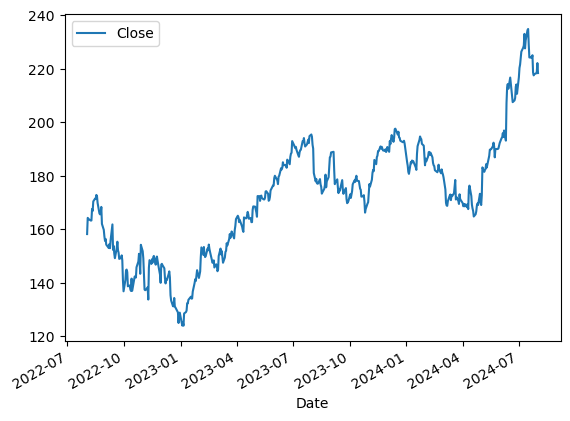

In [6]:
stock.plot.line(y="Close")

In [7]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [8]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-02 00:00:00-04:00,158.308960,160.593116,157.844217,158.219955,59907000,164.271469
2022-08-03 00:00:00-04:00,159.040641,164.726315,158.951652,164.271469,82507500,163.955048
2022-08-04 00:00:00-04:00,164.152807,165.319614,162.590481,163.955048,55474100,163.727310
2022-08-05 00:00:00-04:00,161.608312,164.222403,161.400366,163.727310,56697000,163.252014
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,163.301544
...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,218.240005
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,218.800003
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,222.080002


In [9]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [10]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-02 00:00:00-04:00,158.308960,160.593116,157.844217,158.219955,59907000,164.271469,1
2022-08-03 00:00:00-04:00,159.040641,164.726315,158.951652,164.271469,82507500,163.955048,0
2022-08-04 00:00:00-04:00,164.152807,165.319614,162.590481,163.955048,55474100,163.727310,0
2022-08-05 00:00:00-04:00,161.608312,164.222403,161.400366,163.727310,56697000,163.252014,0
2022-08-08 00:00:00-04:00,164.737294,166.163164,162.588591,163.252014,60276900,163.301544,1
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,218.240005,1
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,218.800003,1
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,222.080002,1


In [11]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [12]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [14]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5158 - loss: 0.6955
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.6044 - loss: 0.6865
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.5886 - loss: 0.6847
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5967 - loss: 0.6797
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5752 - loss: 0.6827
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6188 - loss: 0.6773
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6702 - loss: 0.6696
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.6920 - loss: 0.6593
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.7412 - loss: 0.6605
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7649 - loss: 0.6468
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7433 - loss: 0.6385
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.9696 - loss: 0.1539
Test Loss: 0.18609875440597534, Test Accuracy: 0.9603960514068604


In [18]:
# Make predictions
predictions = model.predict(X_test_df).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [19]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [25]:
precision_score(y_test,predictions)

1.0

<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Date'>

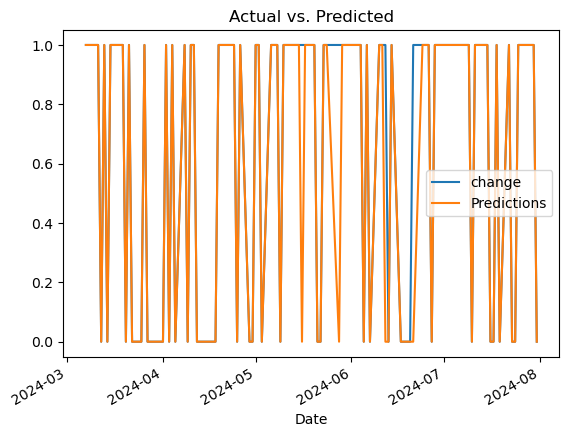

In [23]:
# Combine actual values and predictions
combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')

In [27]:
predictions_df.value_counts()

Predictions
1.0            60
0.0            41
Name: count, dtype: int64